## Taxi Duration Prediction

#### Problem defination 
Exploratory data analysis for the Taxi trip duration prediction. Making sure that all the data variables are explored and patterns uncovered.

#### Hypothesis Generation
Next, we will have to make some exhaustive hypothesis 
###### Number of passengers
-The more the passenger the more the duration
-if more passanger travel on a weekend the trip is likely to last longer

###### Vendor type
- Vendor 2 have more travel time than vendor one

###### Time
- The later hours show more traffic
- Is the weekday busier than wekends

###### Duration
- How does thje duration increase with respect with distance.

######  Distance
- The distance is corrolates witht he direction of the travel
- on average how is the distance affected by vendor type

## EDA
### Now we Explore the data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#importing data
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
#data head
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#data head
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [5]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(729322, 11)

In [6]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
#check for missing variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [8]:
# Identifying variables with object datatype
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [9]:
# Identifying variables with object datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [10]:
#check the data if it is categorical variable
data.store_and_fwd_flag.value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

#### Summary
The pickupdate and time should be datetime \
the dropoff date time should be also datetime\
the vendor_id is identity variable it is ok at integer\
the passenger count is the number of passanger in the car it should integer\
the trip duration in seconds can be integer\
convert the store_and_fwd_flag to categorical variable\
then convert the vendor_id to a categorical variable

In [11]:
# converting "dependents" and "city" to their respective types
data[['pickup_datetime','dropoff_datetime']] = data[['pickup_datetime','dropoff_datetime']].apply(lambda _: pd.to_datetime(_,format='%Y-%m-%d %H:%M:%S.%f', errors='coerce'))
# typecasting "vendor","store fwd flag" " to category type
data['vendor_id'] = data['vendor_id'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')
# checking
data[['pickup_datetime','dropoff_datetime']].dtypes

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object

#### Next step
Create the new column and verify the trip duratrion.

In [12]:
data['duration'] = data.apply(lambda x: (x['dropoff_datetime'] - x['pickup_datetime']).seconds, axis=1)

In [13]:
#check if the two varables are similar if so then drop one
data[['duration','trip_duration']][:]

,duration,trip_duration
0,400,400
1,1100,1100
2,1635,1635
3,1141,1141
4,848,848
...,...,...
729317,296,296
729318,315,315
729319,673,673
729320,447,447


##### Create the date and time for pick_up

In [14]:
new_df = pd.DataFrame({"pickup_year":      data['pickup_datetime'].dt.year,
                       "pickup_month":     data['pickup_datetime'].dt.week,
                       "pickup_day":       data['pickup_datetime'].dt.day,
                       "pickup_dayofyear": data['pickup_datetime'].dt.dayofyear,
                       "pickup_dayofweek": data['pickup_datetime'].dt.weekday,
                       "pickup_quarter":    data['pickup_datetime'].dt.quarter,
                       "pickup_hour":      data['pickup_datetime'].dt.hour,
                       "pickup_minute":    data['pickup_datetime'].dt.minute
                      })
new_df.head()
                       

,pickup_year,pickup_month,pickup_day,pickup_dayofyear,pickup_dayofweek,pickup_quarter,pickup_hour,pickup_minute
0,2016,9,29,60,0,1,16,40
1,2016,10,11,71,4,1,23,35
2,2016,7,21,52,6,1,17,59
3,2016,1,5,5,1,1,9,44
4,2016,7,17,48,2,1,6,42


In [15]:
#concatenate the newly formed data set
combined_data = pd.concat([data,new_df], axis=1)
combined_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,duration,pickup_year,pickup_month,pickup_day,pickup_dayofyear,pickup_dayofweek,pickup_quarter,pickup_hour,pickup_minute
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,400,2016,9,29,60,0,1,16,40
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,1100,2016,10,11,71,4,1,23,35
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,1635,2016,7,21,52,6,1,17,59
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1141,2016,1,5,5,1,1,9,44
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,848,2016,7,17,48,2,1,6,42


In [16]:
#drop the time data set
combined_data = combined_data.drop(columns=['pickup_datetime','dropoff_datetime','trip_duration']) 

#### Get the distance travelled and the direction of the travel

In [17]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def direction_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


combined_data['distance'] = haversine_array(combined_data['pickup_latitude'].values, 
                                                     combined_data['pickup_longitude'].values, 
                                                     combined_data['dropoff_latitude'].values, 
                                                     combined_data['dropoff_longitude'].values)


combined_data['direction'] = direction_array(combined_data['pickup_latitude'].values, 
                                          combined_data['pickup_longitude'].values, 
                                          combined_data['dropoff_latitude'].values, 
                                          combined_data['dropoff_longitude'].values)

## Univariate analysis Numerical Variables

In [18]:
combined_data.select_dtypes(include=['int64','float64','category']).dtypes

vendor_id             category
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
duration                 int64
pickup_year              int64
pickup_month             int64
pickup_day               int64
pickup_dayofyear         int64
pickup_dayofweek         int64
pickup_quarter           int64
pickup_hour              int64
pickup_minute            int64
distance               float64
direction              float64
dtype: object

In [19]:
# seggregating variables into groups
people = ['passenger_count','duration']
route  = ['direction', 'distance']
time1  = ['pickup_minute','pickup_hour','pickup_day']
time2  = ['pickup_year','pickup_month', 'pickup_quarter']
time3  = ['pickup_dayofweek','pickup_dayofyear']

In [20]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

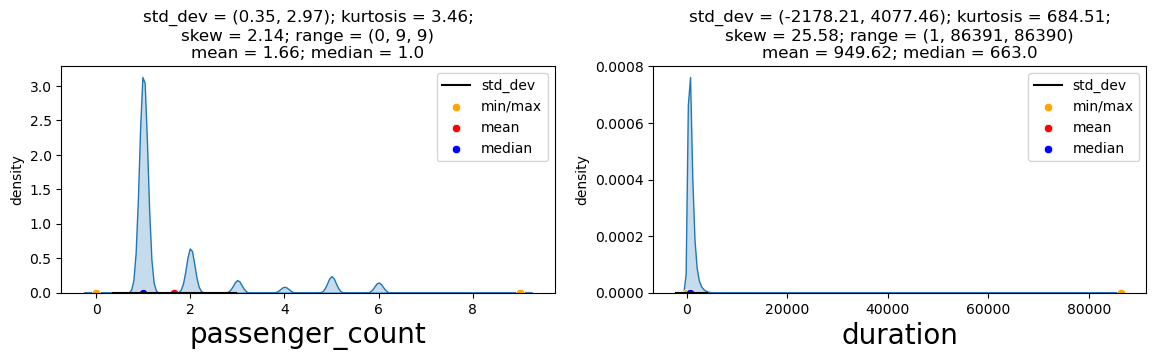

In [21]:
UVA_numeric(combined_data, people)

### summary 
- Passenger count
The plot shows that on average 1.66 perssangers on each ride.\
The range of data is from 0-9\
the data id possitively skewed there is few outliers present. 
- duration
The **skew** +25.58 shows it is possitively biased data\
Also the kurtosis justifies the presence of extreem numberew in the data 

- distance
The +40.98 value for **skew** shows it is possitively skewed data.\
**Kurtosis 9795** shows there is presence of extreem numbers and outliers


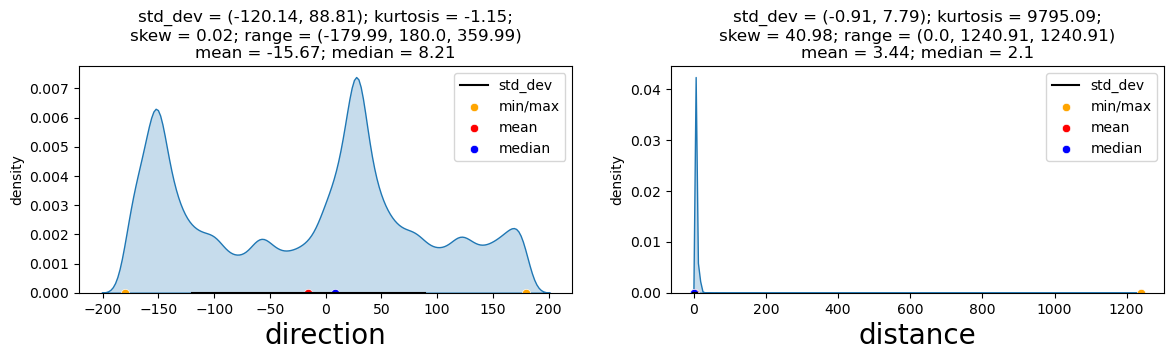

In [22]:

UVA_numeric(combined_data, route)

#### Summary
- Direction
The two high spots shows that direction each way of the taxi trips\
There is almost as much trips on either side of the traffic. 

- Distance
The distance is possitively skewed \
The data contains alot of outliers as seen the max diatance is 1240m

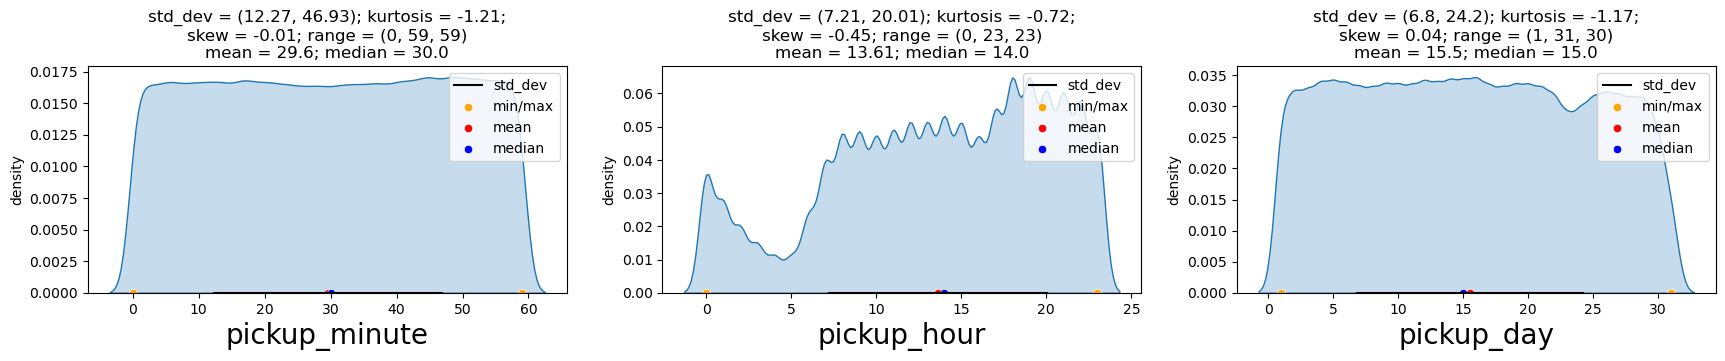

In [23]:
UVA_numeric(combined_data, time1)

#### Sumary
- Minute
The minute chart shows that the minute is not showing enough information
- Hour
The busiest hr is from 17:00hrs to 24:00hrs\
The lowest **traffic** is experienced at 5:00hrs\
At 6:00hrs the demain becomes step again rising through to 8:00hrs\
The **kurtosis** value of -0.72 means ther is less outlier present in the data. 

- Day
The daily demand for taxi ride remains constant from the 1st through the 24th day\
A slight decrase in demand

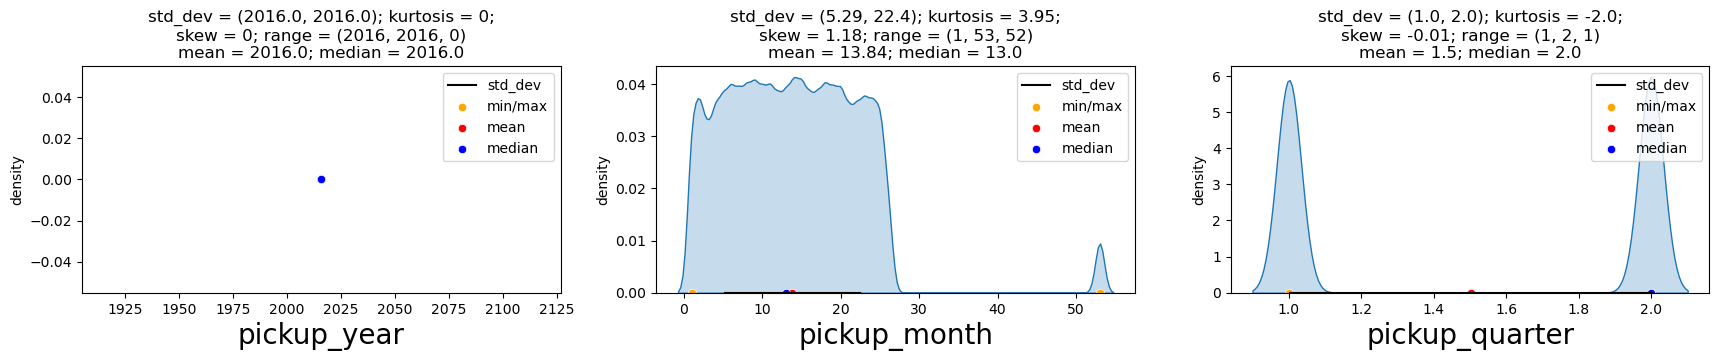

In [24]:
UVA_numeric(combined_data, time2)

#### Summary
-Year
Very interesting data value here as the data represent mostly the data from two years

-Month
The mothly distribution is quite interesting also ther seems to be two group of month.\
The first to 27th month and the 50th month\
why was there a data gap?

-Quarter
There is mostly data from quater one and two \
Even though the dta sgows a 24 month period most of the data is from the first and the second quarter. This represents a pattern. 


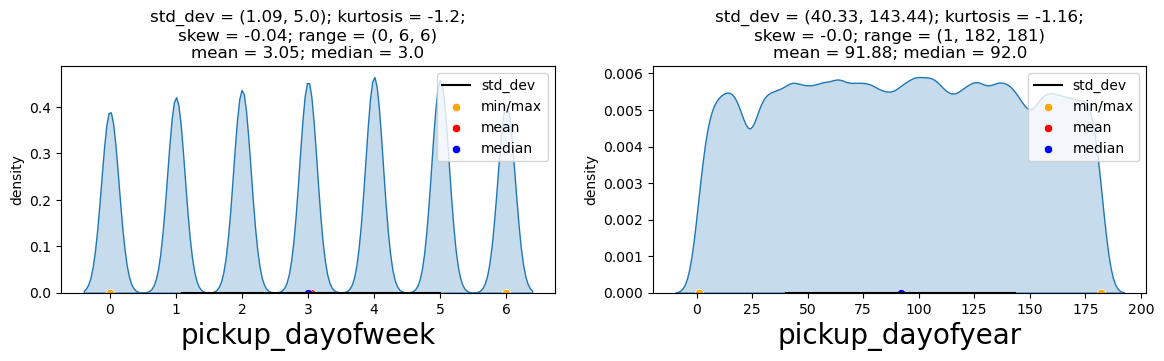

In [25]:
UVA_numeric(combined_data, time3)

#### Summary
- Day of week
The data shows the taxi ride peaks at thursday \
There is demand all through the week, monday to saturday.\
Sunday shows little or no data\
- Year
almost a smooth curve for the day of year\
Ofcourse there are some days demand slowed like the 25th and 150day\
A quick verification show that Jan 25th and May 27th are a holidays in the USA.


## Univariate Analysis : Categorical Varibales

In [26]:
combined_data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

id                      object
vendor_id             category
store_and_fwd_flag    category
dtype: object

In [27]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

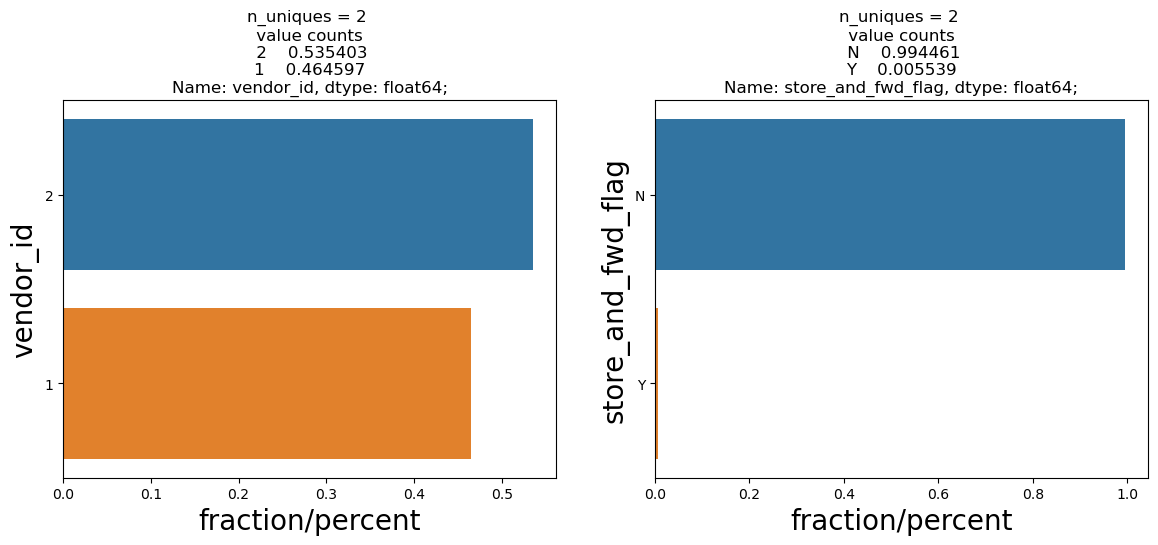

In [28]:
# Custom function for easy visualisation of Categorical Variables
UVA_category(data, ['vendor_id','store_and_fwd_flag'])

#### Summary
- Vendors
The vendors are performing great the unique counts shows that Vendor 2 has more bookings than vendor 1
- Store and fwd flag
The Mode of this values is the N sign

### Univariate: Missing Values Numerical

In [29]:
combined_data.isnull().sum()

id                    0
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
duration              0
pickup_year           0
pickup_month          0
pickup_day            0
pickup_dayofyear      0
pickup_dayofweek      0
pickup_quarter        0
pickup_hour           0
pickup_minute         0
distance              0
direction             0
dtype: int64

#### Summary
The data is totally free from missing values 
It saves alot of time for more hypothesis 

In [30]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True


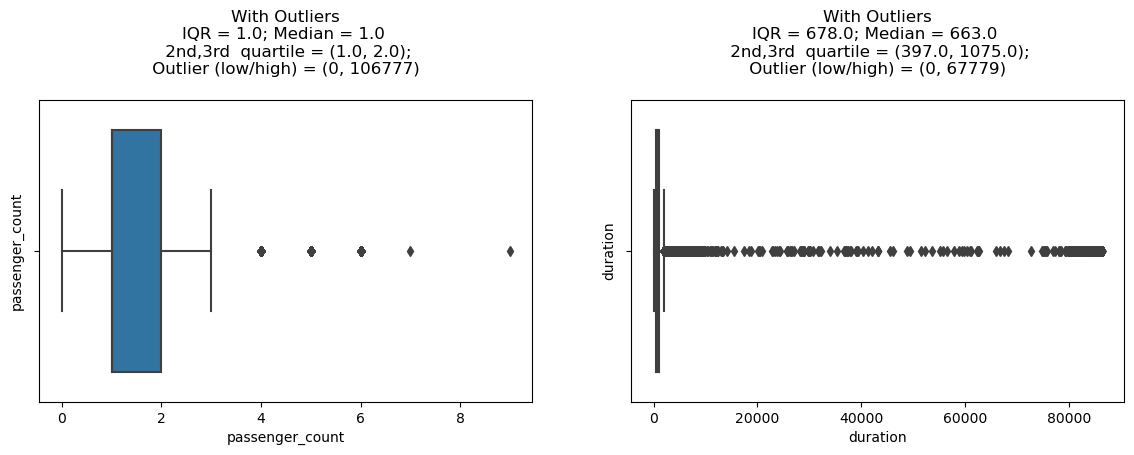

In [31]:
UVA_outlier(data, people)

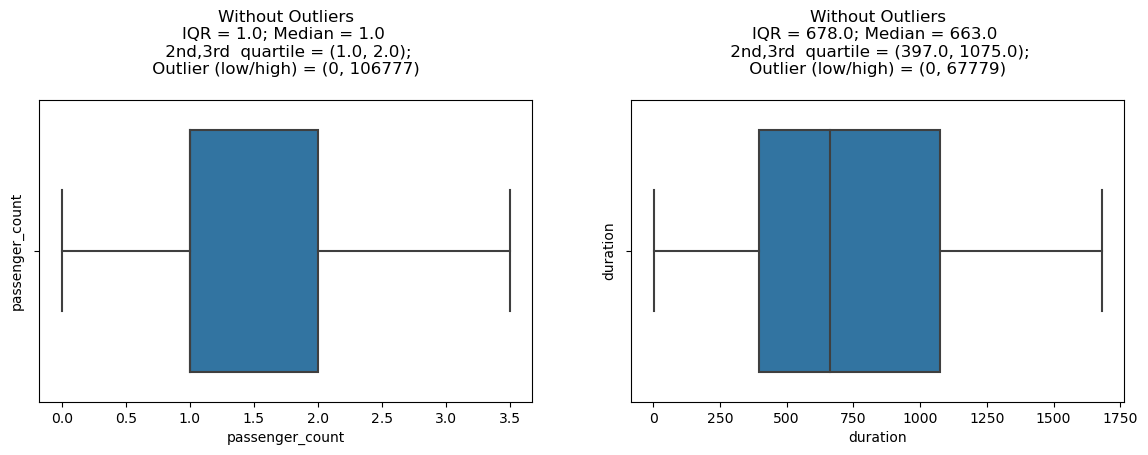

In [32]:
UVA_outlier(data, people, include_outlier = False)

### Summary 
The outliers removed the values mean and mode are shown above\
the values now fall inbetween the interquatile range can be 

## Bivariate Analysis : Numerical-Numerical

In [33]:
# isolating numerical datatypes
numerical = combined_data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
duration               int64
pickup_year            int64
pickup_month           int64
pickup_day             int64
pickup_dayofyear       int64
pickup_dayofweek       int64
pickup_quarter         int64
pickup_hour            int64
pickup_minute          int64
distance             float64
direction            float64
dtype: object

### Correlation Matrix

In [34]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,duration,pickup_year,pickup_month,pickup_day,pickup_dayofyear,pickup_dayofweek,pickup_quarter,pickup_hour,pickup_minute,distance,direction
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.016510,NaN,0.005154,0.001737,-0.001182,0.025758,0.000337,0.009851,-0.000213,0.009175,0.000497
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.041601,NaN,0.006579,-0.001378,0.003737,-0.016031,0.004155,0.010754,-0.003699,0.251482,-0.118218
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.044490,NaN,-0.004786,-0.006367,-0.001244,-0.029073,-0.000392,0.011433,0.002841,-0.128455,-0.114586
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.025333,NaN,0.005541,-0.000294,0.003762,-0.001473,0.003538,-0.022014,-0.003606,0.132353,0.175405
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.035438,NaN,-0.002402,-0.006082,-0.001627,-0.022028,0.000093,0.014257,0.002800,-0.153760,0.052084
duration,0.016510,0.041601,-0.044490,0.025333,-0.035438,1.000000,NaN,0.011020,0.002240,0.013040,-0.001971,0.012424,0.005452,-0.004537,0.152200,0.002781
pickup_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_month,0.005154,0.006579,-0.004786,0.005541,-0.002402,0.011020,NaN,1.000000,0.000254,0.713257,0.039290,0.656614,-0.016984,-0.001220,0.021710,-0.001816
pickup_day,0.001737,-0.001378,-0.006367,-0.000294,-0.006082,0.002240,NaN,0.000254,1.000000,0.153732,0.005639,-0.014326,-0.001699,-0.001369,0.005136,-0.000924
pickup_dayofyear,-0.001182,0.003737,-0.001244,0.003762,-0.001627,0.013040,NaN,0.713257,0.153732,1.000000,-0.012497,0.862306,-0.003549,-0.000564,0.017201,-0.001640


In [35]:
### Heatmap

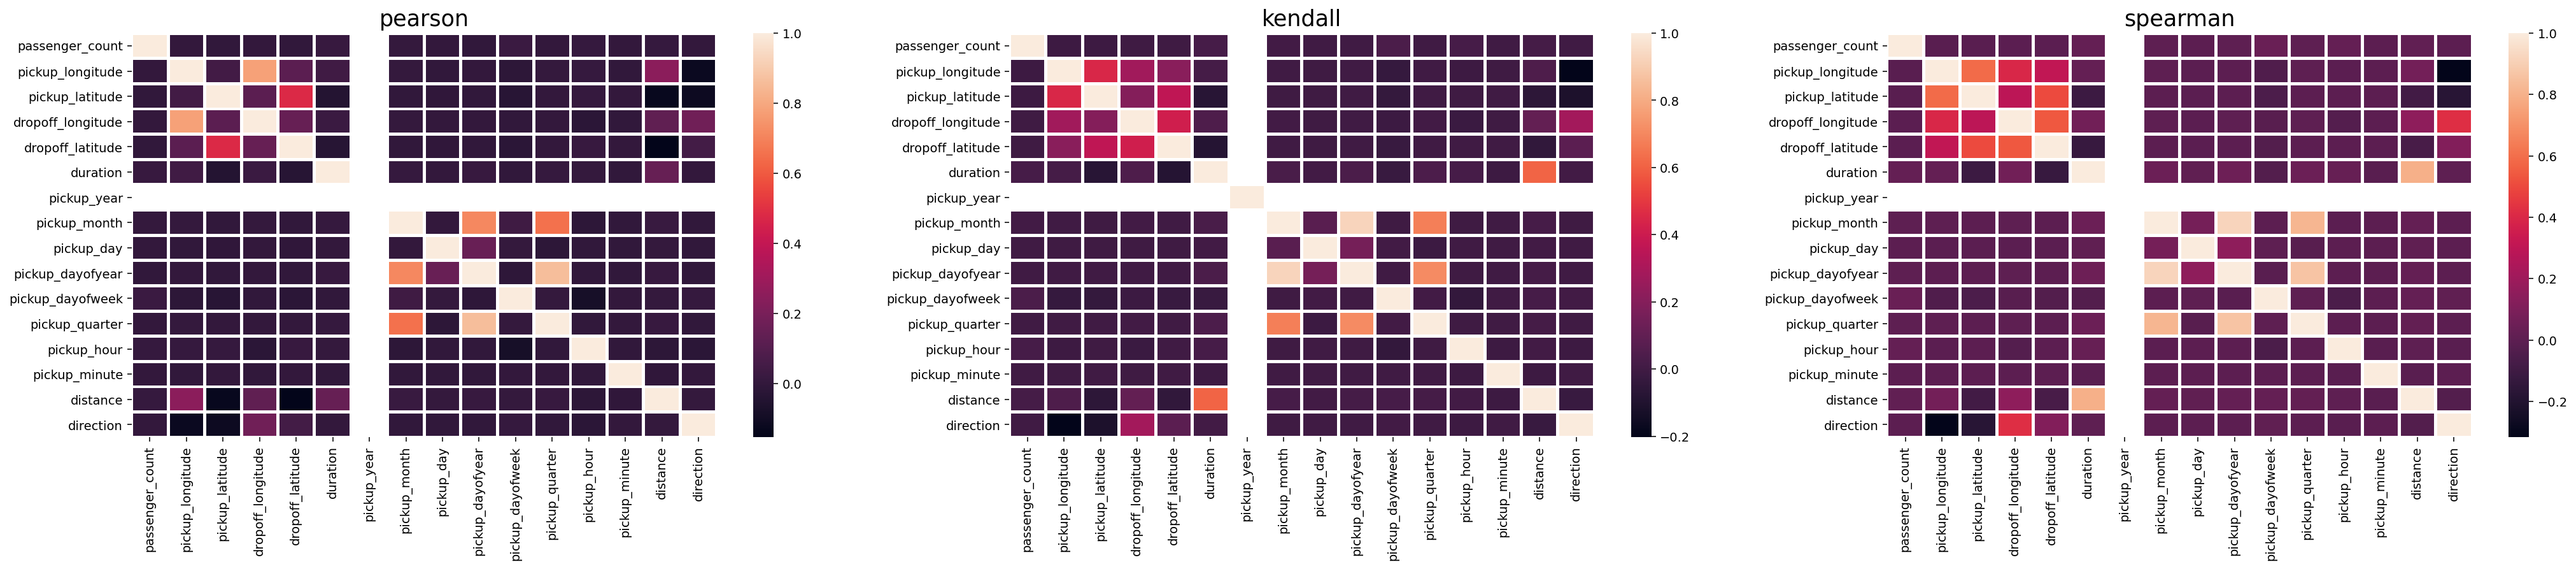

In [36]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



- Kendall,pearson and spearman shows a close corollation similarities expecially in pattern.
- Too many variable with insignificant correlation many correlation lies in the day of montha nd time segment

In [38]:
# extracting transaction information of current and previous months
var = []
var.extend(time1)
var.extend(time2)
var.extend(time3)

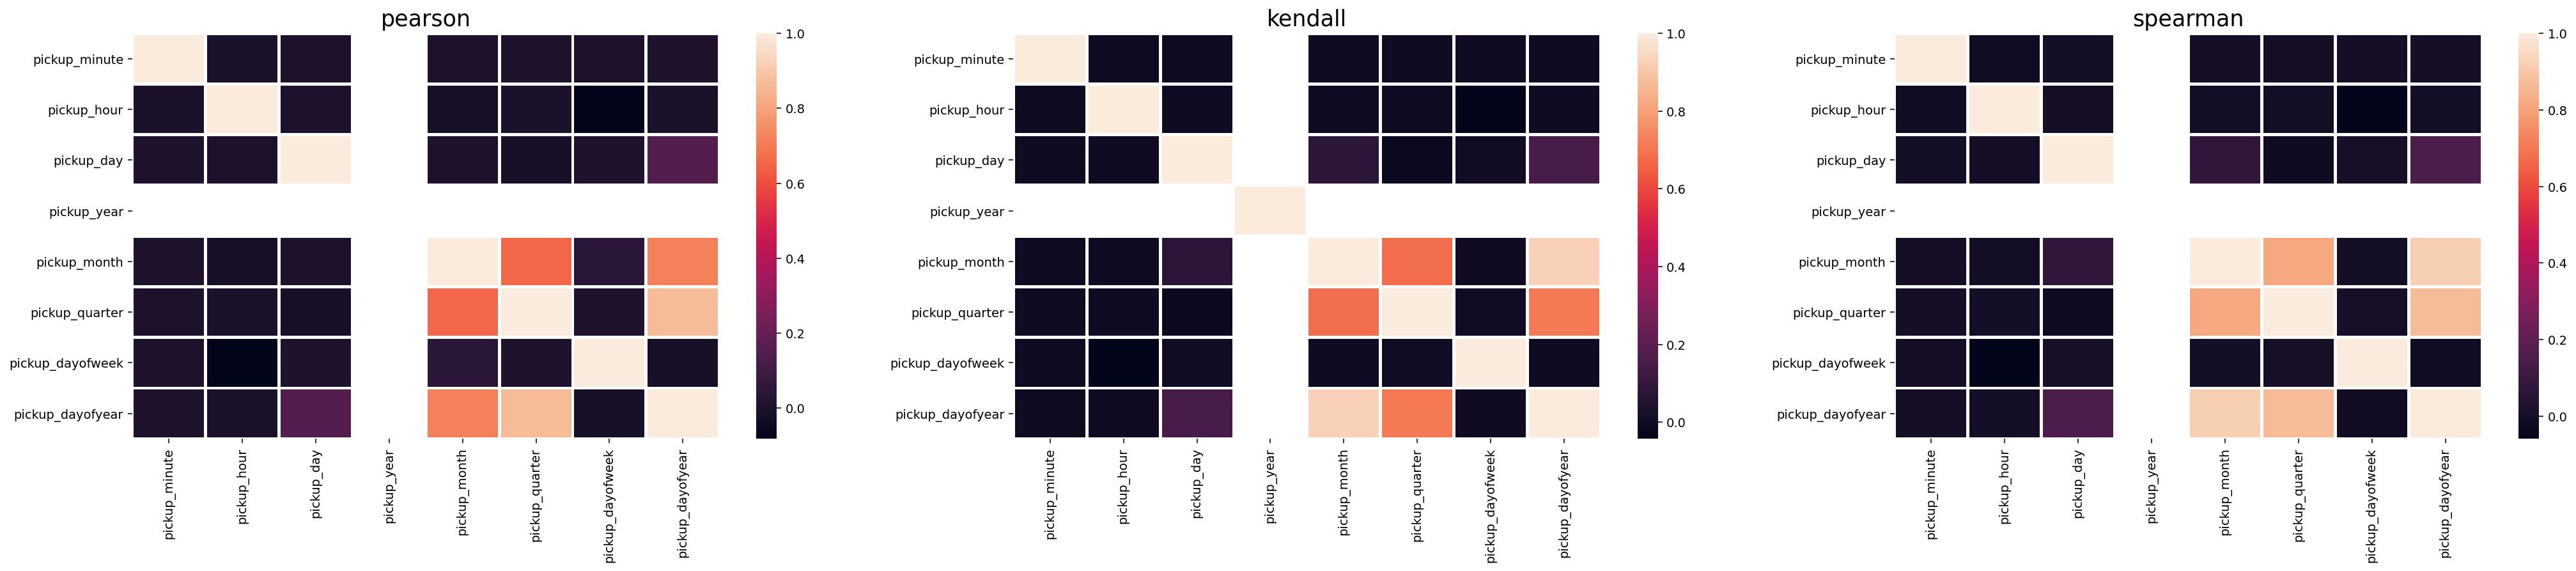

In [39]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

- pickup month andquater show correlation between each other 
- same as pickup quater and year

## Scatter Plot

In [40]:
# Grouping variables
route  = ['direction', 'distance','passenger_count','duration']
time1  = ['pickup_minute','pickup_hour','pickup_day','pickup_year','pickup_month', 'pickup_quarter','pickup_dayofweek','pickup_dayofyear']



<Figure size 840x560 with 0 Axes>

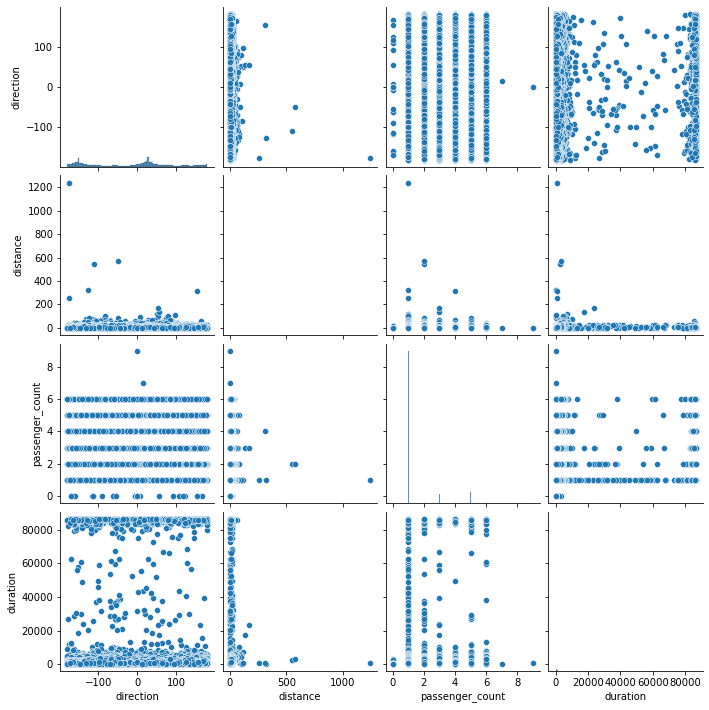

In [41]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[route])

- This scatter plot isnt Meangingful as the data does not show lot of correlation

<Figure size 840x560 with 0 Axes>

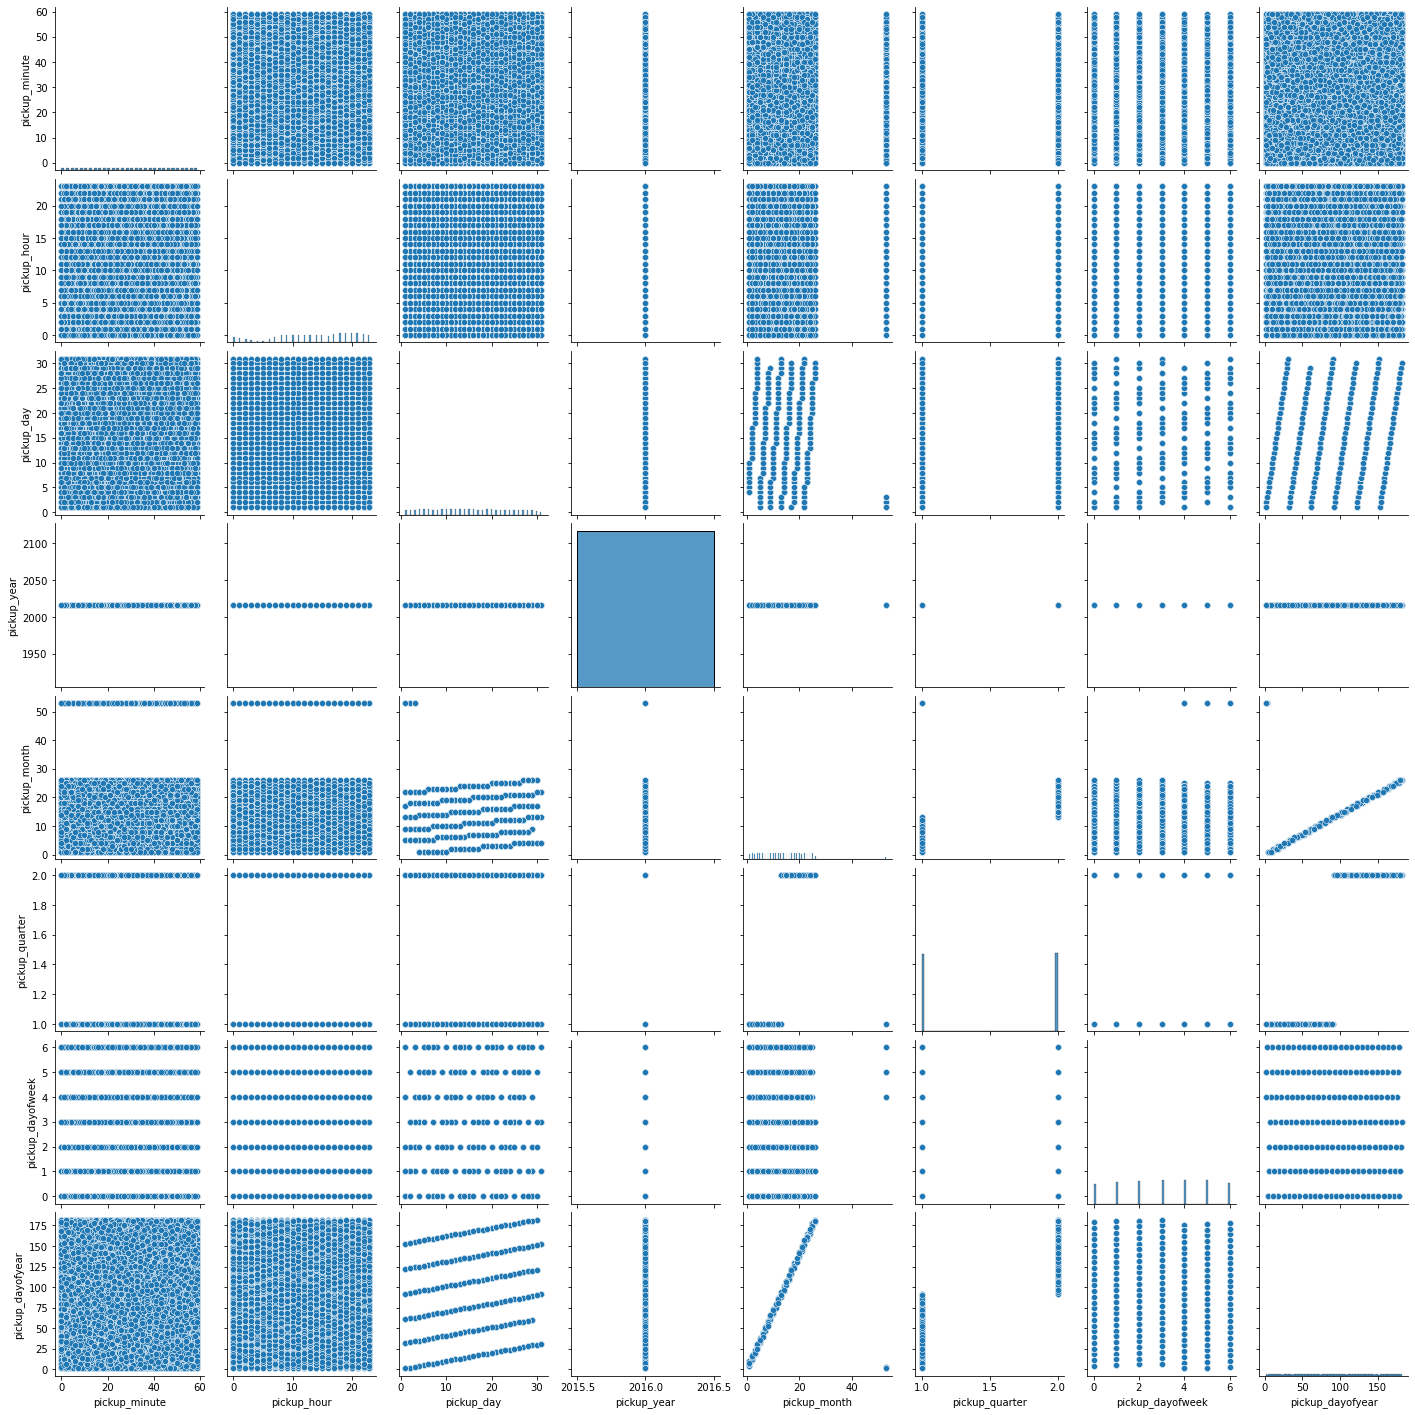

In [42]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[time1])

- As seen this shown a possitive correlation between the dayof year and the pickup_month

<Figure size 840x560 with 0 Axes>

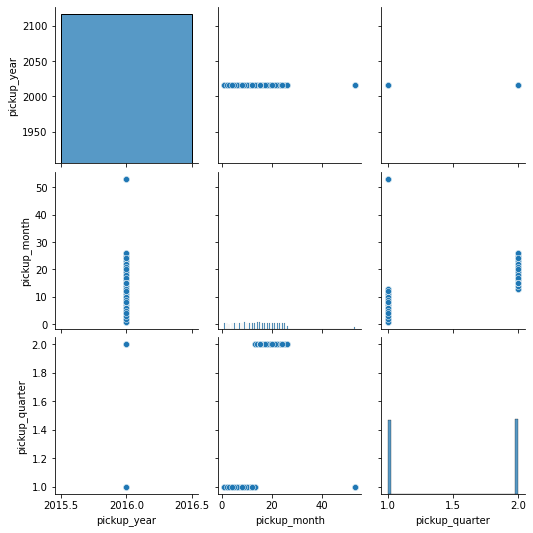

In [43]:
plt.figure(dpi=140)
sns.pairplot(numerical[time2])

- This dosen't show meaning, as data does not show any correlation

<Figure size 840x560 with 0 Axes>

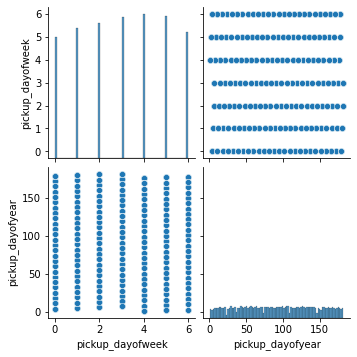

In [45]:
plt.figure(dpi=140)
sns.pairplot(numerical[time3])

- This dosen't show meaning, as data does not show any correlation

## Bivariate : Categorical-Categorical

Finally a quick look at the Categorical -Categorical Bivariate analysis\
Although we have only two values a quick evaluation is applied
- Hypothesis
Does the Vendor id relates to the stor flag

In [46]:
def BVA_categorical_plot(data, cat1, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,cat1]][:]

  #forming a crosstab
  table = pd.crosstab(data[cat1],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=cat1, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[cat1].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

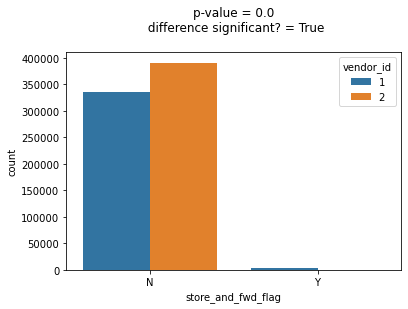

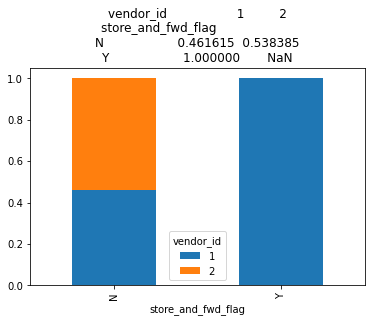

In [47]:
BVA_categorical_plot(combined_data, 'vendor_id','store_and_fwd_flag')

####  Findings
- There is a significant difference between the both. The Y-sign is id monotonous compared to N-sign
- It is interesting finding that the Vendor 1 shows 100% Y-sign and both share the N- sign
Could this have a significant impact on the duration prediction?



### Thank you very much reading